In [1]:
import os
import sys
from collections import Counter

import pydicom
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
!mkdir ./dcm_scratch
!rm ./dcm_scratch/*
!cp /mnt/ml4cvd/projects/bulk/liver_mri/1000387_20254_2_0.zip ./dcm_scratch/
!unzip ./dcm_scratch/1000387_20254_2_0.zip -d ./dcm_scratch/

mkdir: cannot create directory './dcm_scratch': File exists
rm: cannot remove './dcm_scratch/*': No such file or directory
Archive:  ./dcm_scratch/1000387_20254_2_0.zip
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.141243.201801121807516955793105.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.141243.201801121807515905593093.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.141243.201801121807515920393095.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.141243.201801121807515764593090.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.141243.201801121807516743793102.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.141243.201801121807516188493099.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.141243.2018011218075268650593126.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.141243.2018011218075268674693127.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.141243.2018011218075268856893130.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.141243

In [3]:
stats = Counter()
dcm_dir = './dcm_scratch/'
for dcm_file in os.listdir(dcm_dir):
    if not dcm_file.endswith('.dcm'):
        continue
    dcm = pydicom.read_file(dcm_dir + dcm_file)
    stats['count'] += 1
    stats[f'series_num_{dcm.SeriesNumber}'] += 1
    stats[f'Series Description_{dcm.SeriesDescription}'] += 1
    stats[f'Series InstanceNumber_{dcm.InstanceNumber}'] += 1
    stats[f'Pixel spacing{dcm.PixelSpacing}'] += 1
    stats[f'Shape {dcm.pixel_array.shape}'] += 1
    stats[f'Big pix:{dcm.LargestImagePixelValue}'] += 1

for k in stats:
    print(f'{k} has {stats[k]}')

count has 72
series_num_34 has 6
Series Description_LMS IDEAL OPTIMISED LOW FLIP 6DYN has 72
Series InstanceNumber_3 has 12
Pixel spacing['1.71875', '1.71875'] has 72
Shape (232, 256) has 72
Big pix:4095 has 36
series_num_38 has 6
Series InstanceNumber_1 has 12
series_num_40 has 6
series_num_41 has 6
Big pix:81 has 2
series_num_35 has 6
Big pix:129 has 3
series_num_33 has 6
Series InstanceNumber_6 has 12
Big pix:50 has 4
series_num_37 has 6
Big pix:82 has 3
series_num_42 has 6
Series InstanceNumber_5 has 12
Big pix:53 has 5
series_num_39 has 6
Series InstanceNumber_2 has 12
Big pix:98 has 4
series_num_31 has 6
Series InstanceNumber_4 has 12
Big pix:60 has 3
Big pix:130 has 1
Big pix:83 has 1
Big pix:51 has 2
series_num_36 has 6
Big pix:59 has 2
series_num_32 has 6
Big pix:131 has 1
Big pix:99 has 2
Big pix:56 has 1
Big pix:63 has 1
Big pix:128 has 1


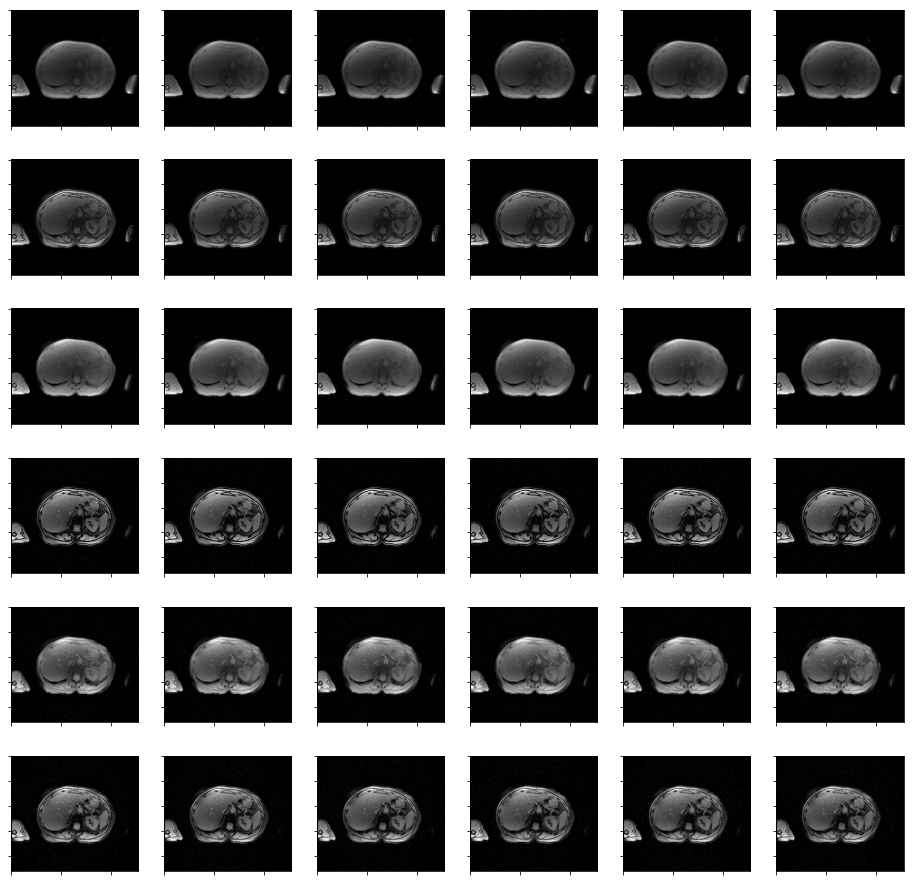

In [4]:
_, axes = plt.subplots(6, 6, figsize=(16, 16))
for dcm_file in os.listdir(dcm_dir):
    if not dcm_file.endswith('.dcm'):
        continue
    dcm = pydicom.read_file(dcm_dir + dcm_file)
    row = 0
    if dcm.LargestImagePixelValue > 1024:
        row = 1
        continue
    ideal_index = 6*(int(dcm.InstanceNumber)-1) + ((dcm.SeriesNumber-31)//2)  
    axes[ideal_index//6, ideal_index%6].imshow(dcm.pixel_array, cmap='gray', vmin=np.min(dcm.pixel_array), vmax=np.max(dcm.pixel_array))
    axes[ideal_index//6, ideal_index%6].set_yticklabels([])
    axes[ideal_index//6, ideal_index%6].set_xticklabels([])

In [5]:
!rm ./dcm_scratch/*
!cp /mnt/ml4cvd/projects/bulk/liver_mri/1000795_20203_2_0.zip ./dcm_scratch/
!unzip ./dcm_scratch/1000795_20203_2_0.zip -d ./dcm_scratch/

Archive:  ./dcm_scratch/1000795_20203_2_0.zip
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.41754.2016090718191717035204595.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.41754.2016090718191717929504604.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.41754.2016090718191717261704598.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.41754.2016090718191718163304607.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.41754.2016090718191718492704613.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.41754.2016090718191718223804610.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.41754.2016090718191716795304592.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.41754.2016090718191717517904601.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.41754.2016090718191720869704616.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.41754.2016090718191721048604619.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.41754.2016090718191716814404593.dcm  
  inflat

In [6]:
stats = Counter()
dcm_dir = './dcm_scratch/'
for dcm_file in os.listdir(dcm_dir):
    if not dcm_file.endswith('.dcm'):
        continue
    dcm = pydicom.read_file(dcm_dir + dcm_file)
    stats['count'] += 1
    stats[f'series_num_{dcm.SeriesNumber}'] += 1
    stats[f'Series Description_{dcm.SeriesDescription}'] += 1
    stats[f'Series InstanceNumber_{dcm.InstanceNumber}'] += 1
    stats[f'Pixel spacing{dcm.PixelSpacing}'] += 1
    stats[f'Shape {dcm.pixel_array.shape}'] += 1
    stats[f'Big pix:{dcm.LargestImagePixelValue}'] += 1

for k in stats:
    print(f'{k} has {stats[k]}')

count has 20
series_num_27 has 10
Series Description_gre_mullti_echo_10_TE_liver has 20
Series InstanceNumber_2 has 2
Pixel spacing['2.5', '2.5'] has 20
Shape (160, 160) has 20
Big pix:489 has 1
series_num_28 has 10
Series InstanceNumber_6 has 2
Big pix:4095 has 10
Series InstanceNumber_4 has 2
Big pix:272 has 1
Series InstanceNumber_8 has 2
Series InstanceNumber_9 has 2
Series InstanceNumber_10 has 2
Series InstanceNumber_1 has 2
Big pix:446 has 1
Series InstanceNumber_7 has 2
Series InstanceNumber_3 has 2
Big pix:243 has 1
Big pix:309 has 1
Series InstanceNumber_5 has 2
Big pix:283 has 1
Big pix:325 has 1
Big pix:264 has 1
Big pix:247 has 1
Big pix:315 has 1


Series: gre_mullti_echo_10_te_liver Instance number: 2, pix space['2.5', '2.5'] big pix:489
Series: gre_mullti_echo_10_te_liver Instance number: 6, pix space['2.5', '2.5'] big pix:4095
Series: gre_mullti_echo_10_te_liver Instance number: 4, pix space['2.5', '2.5'] big pix:272
Series: gre_mullti_echo_10_te_liver Instance number: 8, pix space['2.5', '2.5'] big pix:4095
Series: gre_mullti_echo_10_te_liver Instance number: 9, pix space['2.5', '2.5'] big pix:4095
Series: gre_mullti_echo_10_te_liver Instance number: 4, pix space['2.5', '2.5'] big pix:4095
Series: gre_mullti_echo_10_te_liver Instance number: 10, pix space['2.5', '2.5'] big pix:4095
Series: gre_mullti_echo_10_te_liver Instance number: 1, pix space['2.5', '2.5'] big pix:446
Series: gre_mullti_echo_10_te_liver Instance number: 7, pix space['2.5', '2.5'] big pix:4095
Series: gre_mullti_echo_10_te_liver Instance number: 3, pix space['2.5', '2.5'] big pix:4095
Series: gre_mullti_echo_10_te_liver Instance number: 10, pix space['2.5'

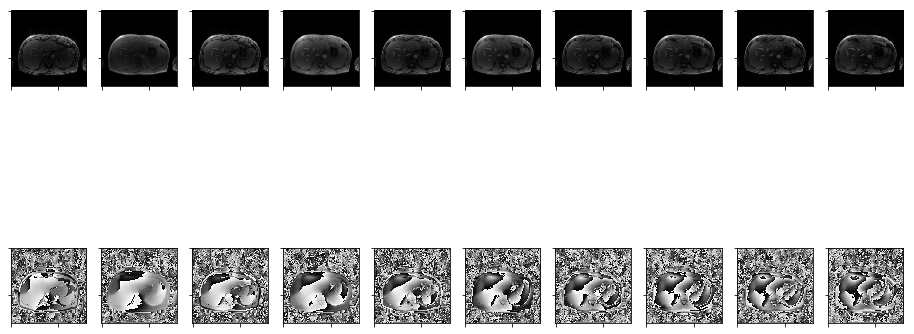

In [7]:
_, axes = plt.subplots(2, 10, figsize=(16, 8))
for dcm_file in os.listdir(dcm_dir):
    if not dcm_file.endswith('.dcm'):
        continue
    row = 0
    dcm = pydicom.read_file(dcm_dir + dcm_file)
    print(f"Series: {dcm.SeriesDescription.lower().replace(' ', '_')} Instance number: {dcm.InstanceNumber}, pix space{dcm.PixelSpacing} big pix:{dcm.LargestImagePixelValue}")
    if dcm.LargestImagePixelValue > 1024:
        row = 1    
    axes[row, dcm.InstanceNumber-1].imshow(dcm.pixel_array, cmap='gray', vmin=np.min(dcm.pixel_array), vmax=np.max(dcm.pixel_array))
    axes[row, dcm.InstanceNumber-1].set_yticklabels([])
    axes[row, dcm.InstanceNumber-1].set_xticklabels([])

In [8]:
!rm ./dcm_scratch/*
!cp /mnt/ml4cvd/projects/bulk/liver_mri/1000387_20204_2_0.zip ./dcm_scratch/
!unzip ./dcm_scratch/1000387_20204_2_0.zip -d ./dcm_scratch/

Archive:  ./dcm_scratch/1000387_20204_2_0.zip
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.141243.2018011218065336402292781.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.141243.2018011218065820151492801.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.141243.2018011218065179378392771.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.141243.2018011218065657101392796.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.141243.2018011218065496770892791.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.141243.2018011218065256483592776.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.141243.2018011218065416246392786.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.141243.201801121807016914492803.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.141243.201801121807017062492805.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.141243.2018011218065820116792800.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.141243.2018011218065416214292785.dcm  

In [9]:
stats = Counter()
dcm_dir = './dcm_scratch/'
for dcm_file in os.listdir(dcm_dir):
    if not dcm_file.endswith('.dcm'):
        continue
    dcm = pydicom.read_file(dcm_dir + dcm_file)
    stats['count'] += 1
    stats[f'series_num_{dcm.SeriesNumber}'] += 1
    stats[f'Series Description_{dcm.SeriesDescription}'] += 1
    stats[f'Series InstanceNumber_{dcm.InstanceNumber}'] += 1
    stats[f'Pixel spacing{dcm.PixelSpacing}'] += 1
    stats[f'Shape {dcm.pixel_array.shape}'] += 1
    stats[f'Big pix:{dcm.LargestImagePixelValue}'] += 1

for k in stats:
    print(f'{k} has {stats[k]}')

count has 23
series_num_27 has 7
Series Description_ShMOLLI_192i LIVER has 14
Series InstanceNumber_7 has 3
Pixel spacing['1.1458333730698', '1.1458333730698'] has 23
Shape (288, 384) has 23
Big pix:232 has 1
series_num_30 has 7
Series Description_ShMOLLI_192i LIVER_FITPARAMS has 7
Series InstanceNumber_3 has 3
Big pix:4000 has 6
Series InstanceNumber_6 has 3
Big pix:230 has 1
series_num_29 has 2
Series Description_ShMOLLI_192i LIVER_T1MAP has 2
Series InstanceNumber_2 has 4
Big pix:4095 has 9
series_num_28 has 7
Series InstanceNumber_4 has 3
Series InstanceNumber_5 has 3
Series InstanceNumber_1 has 4
Big pix:228 has 1
Big pix:414 has 2
Big pix:3000 has 1
Big pix:395 has 1
Big pix:412 has 1


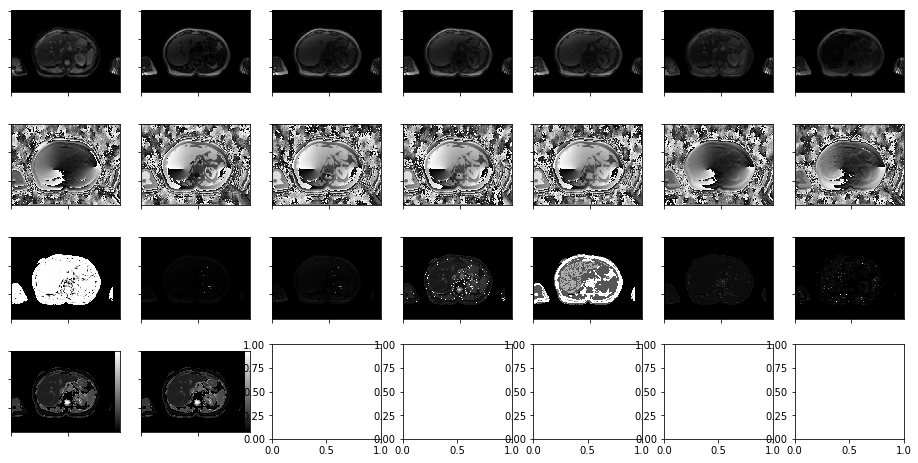

In [10]:
_, axes = plt.subplots(4, 7, figsize=(16, 8))
for dcm_file in os.listdir(dcm_dir):
    if not dcm_file.endswith('.dcm'):
        continue
    row = 0
    dcm = pydicom.read_file(dcm_dir + dcm_file)
   
    if 'fitparams' in dcm.SeriesDescription.lower():
        row = 2
    elif 't1map' in dcm.SeriesDescription.lower():
        row = 3
    elif dcm.LargestImagePixelValue > 1024:
        row = 1 
    axes[row, dcm.InstanceNumber-1].imshow(dcm.pixel_array, cmap='gray', vmin=np.min(dcm.pixel_array), vmax=np.max(dcm.pixel_array))
    axes[row, dcm.InstanceNumber-1].set_yticklabels([])
    axes[row, dcm.InstanceNumber-1].set_xticklabels([])